1. Euclidiean Distance
2. Manhattan Distance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers (2).csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Age', ylabel='Density'>

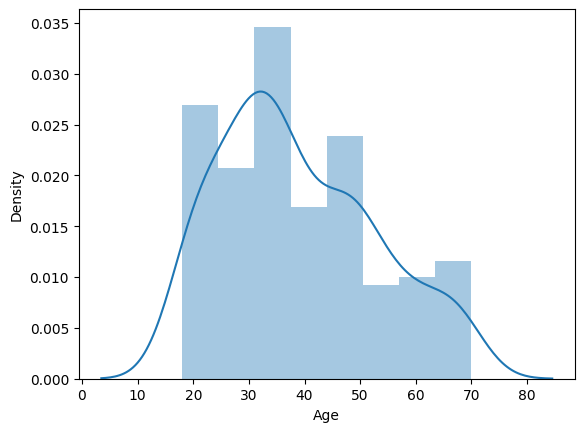

In [5]:
sns.distplot(data['Age'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

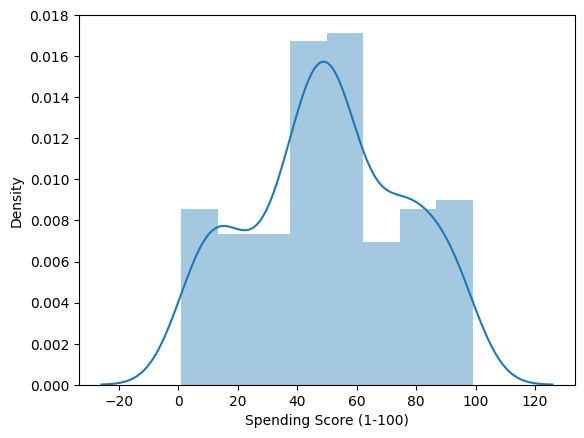

In [6]:
sns.distplot(data['Spending Score (1-100)'])

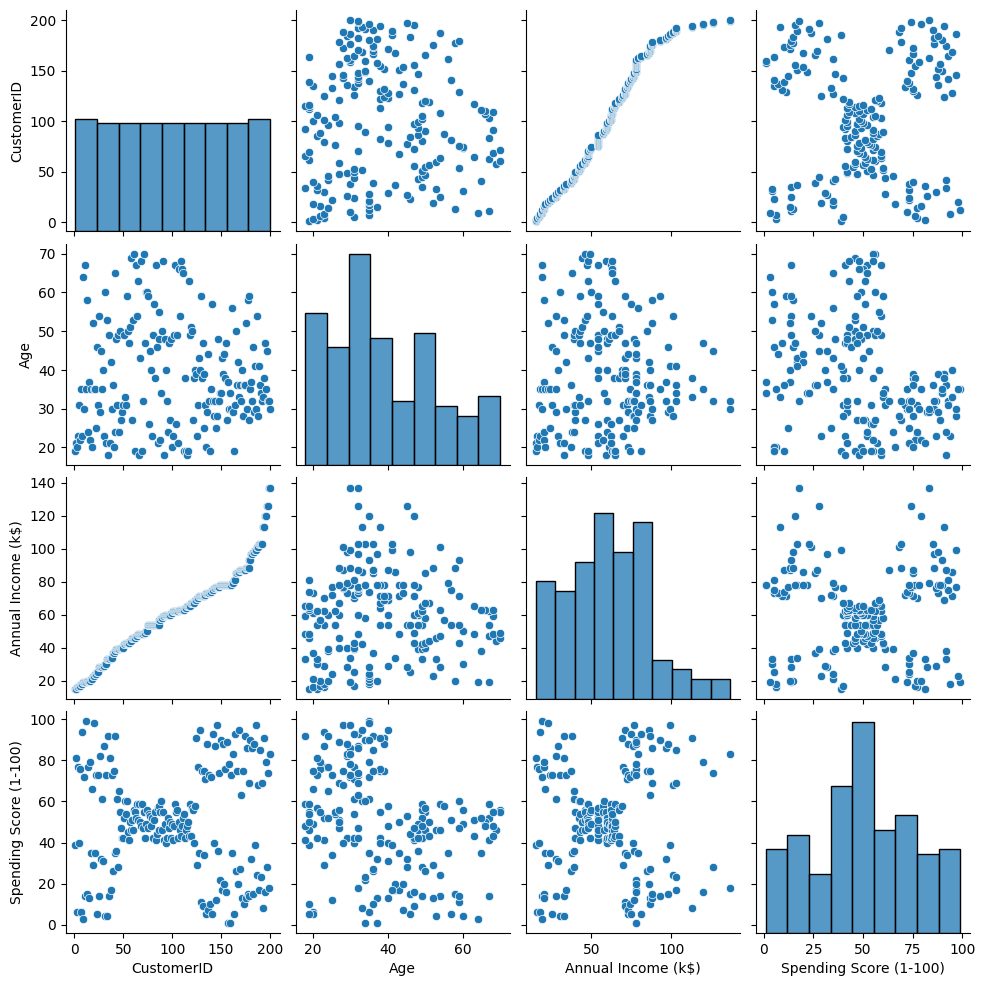

In [7]:
sns.pairplot(data)

In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [12]:
data['Genre'] = le.fit_transform(data['Genre'])

In [13]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
X = data[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]

In [15]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [29]:
X_new = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [16]:
X['Age'].min()

18

In [17]:
X['Age'].max()

70

In [18]:
X['Annual Income (k$)'].min()

15

In [19]:
X['Annual Income (k$)'].max()

137

In [20]:
X['Spending Score (1-100)'].min()

1

In [21]:
X['Spending Score (1-100)'].max()

99

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [30]:
scaled_x = sc.fit_transform(X_new)

In [32]:
# scaled_x

In [27]:
from sklearn.cluster import KMeans

In [ ]:
#elbow technique

In [33]:
cluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(scaled_x)
    cluster.append(km.inertia_) 

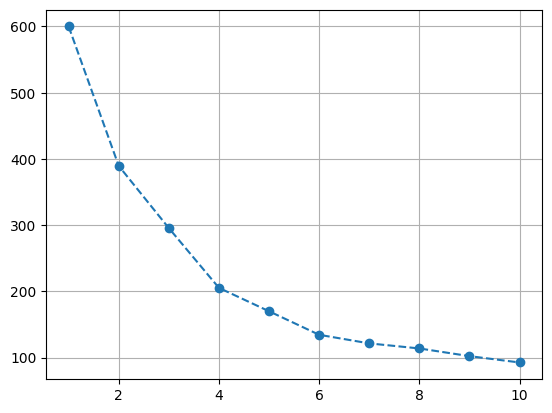

In [35]:
plt.plot(range(1,11),cluster,'o--')
plt.grid()
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5,random_state=42)
ypred = kmeans.fit_predict(scaled_x)

In [42]:
ypred

array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [44]:
data['Predicted_Label'] = ypred

In [45]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,4
197,198,1,32,126,74,1
198,199,1,32,137,18,4


In [47]:
data[data['Predicted_Label'] == 0].describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,68.775862,0.431034,55.275862,47.620690,41.706897,0.0
std,31.021805,0.499546,8.571256,13.413567,15.697814,0.0
min,9.000000,0.000000,40.000000,19.000000,3.000000,0.0
25%,45.500000,0.000000,49.000000,39.250000,37.250000,0.0
50%,69.500000,0.000000,53.000000,48.500000,46.000000,0.0
75%,92.500000,1.000000,63.750000,59.750000,52.000000,0.0
max,120.000000,1.000000,70.000000,67.000000,60.000000,0.0


In [48]:
data[data['Predicted_Label'] == 1].describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.0
mean,161.02500,0.450000,32.875000,86.100000,81.525000,1.0
std,23.33863,0.503831,3.857643,16.339036,9.999968,0.0
min,123.00000,0.000000,27.000000,69.000000,58.000000,1.0
25%,141.50000,0.000000,30.000000,74.750000,74.000000,1.0
50%,161.00000,0.000000,32.000000,78.500000,83.000000,1.0
75%,180.50000,1.000000,36.000000,94.000000,90.000000,1.0
max,200.00000,1.000000,40.000000,137.000000,97.000000,1.0


In [49]:
data[data['Predicted_Label'] == 2].describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,23.461538,0.423077,25.769231,26.115385,74.846154,2.0
std,15.118812,0.503831,5.435496,8.557228,15.069684,0.0
min,1.000000,0.000000,18.000000,15.000000,39.000000,2.0
25%,10.500000,0.000000,21.250000,19.000000,67.500000,2.0
50%,23.000000,0.000000,24.000000,24.500000,75.500000,2.0
75%,35.500000,1.000000,30.750000,33.000000,81.750000,2.0
max,52.000000,1.000000,35.000000,42.000000,99.000000,2.0


In [50]:
data[data['Predicted_Label'] == 3].describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,86.377778,0.400000,26.733333,54.311111,40.911111,3.0
std,38.926089,0.495434,7.085196,16.162277,16.285552,0.0
min,3.000000,0.000000,18.000000,16.000000,5.000000,3.0
25%,62.000000,0.000000,20.000000,46.000000,35.000000,3.0
50%,92.000000,0.000000,26.000000,59.000000,46.000000,3.0
75%,114.000000,1.000000,32.000000,64.000000,54.000000,3.0
max,163.000000,1.000000,40.000000,81.000000,60.000000,3.0


In [51]:
data[data['Predicted_Label'] == 4].describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Predicted_Label
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,166.870968,0.516129,44.387097,89.774194,18.483871,4.0
std,21.153001,0.508001,8.232770,16.754521,10.194348,0.0
min,127.000000,0.000000,32.000000,71.000000,1.000000,4.0
25%,152.000000,0.000000,37.000000,78.000000,12.000000,4.0
50%,169.000000,1.000000,44.000000,87.000000,17.000000,4.0
75%,184.000000,1.000000,49.000000,98.500000,25.000000,4.0
max,199.000000,1.000000,59.000000,137.000000,39.000000,4.0


In [52]:
scaled_x

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [54]:
scaled_x[:,1]

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

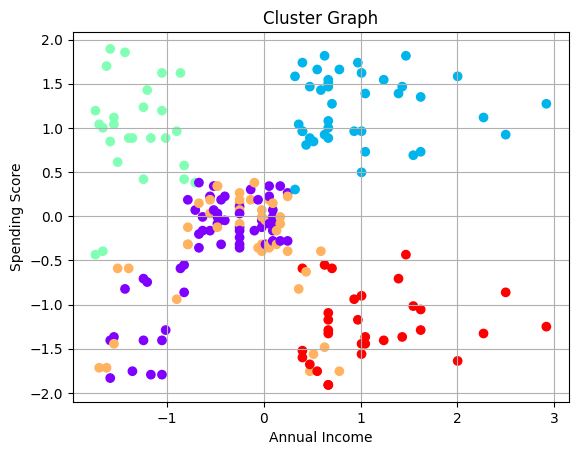

In [57]:
plt.scatter(scaled_x[:,1],scaled_x[:,2],c=ypred,cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Graph')
plt.grid()
plt.show()